# **Q1**. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

**ANS-1** In the context of matrix multiplication, where you have a matrix A with dimensions (n, k) and a matrix B with dimensions (k, m), computing the resulting matrix C with dimensions (n, m) requires n * m * k multiplications and n * m * (k - 1) additions. Each element in the resulting matrix involves k multiplications and k-1 additions to obtain the final value.

# **Q2.** Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [ ]:
def matrix_multiply(a, b):
    n = len(a)
    k = len(a[0])
    m = len(b[0])

    result = [[0 for _ in range(m)] for _ in range(n)]

    for i in range(n):
        for j in range(m):
            for x in range(k):
                result[i][j] += a[i][x] * b[x][j]

    return result

matrix_a = [[1, 2, 3], [4, 5, 6]]
matrix_b = [[7, 8], [9, 10], [11, 12]]

result_list = matrix_multiply(matrix_a, matrix_b)
print("Matrix multiplication result (list of lists):")
for row in result_list:
    print(row)

# Now, let's use NumPy for matrix multiplication:

import numpy as np

np_matrix_a = np.array(matrix_a)
np_matrix_b = np.array(matrix_b)

result_numpy = np.dot(np_matrix_a, np_matrix_b)

print("\nMatrix multiplication result (NumPy):")
print(result_numpy)

import timeit

list_time = timeit.timeit(lambda: matrix_multiply(matrix_a, matrix_b), number=10000)

numpy_time = timeit.timeit(lambda: np.dot(np_matrix_a, np_matrix_b), number=10000)

print("\nTiming comparison:")
print("List of lists time:", list_time)
print("NumPy time:", numpy_time)


Matrix multiplication result (list of lists):
[58, 64]
[139, 154]

Matrix multiplication result (NumPy):
[[ 58  64]
 [139 154]]

Timing comparison:
List of lists time: 0.10432331799998451
NumPy time: 0.028629553000001806


**ANS-2** NumPy is generally faster than a standard Python implementation using lists of lists because NumPy is implemented in C and optimized for numerical operations. NumPy uses highly optimized algorithms and takes advantage of hardware-specific features, making it more efficient for matrix operations. Therefore, you should observe that the NumPy solution is faster than the list of lists solution in most cases.

# **Q3.** Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

**ANS-3** Using the method you described, finding the median of an array would involve sorting the array, and then finding the middle element. Sorting itself has a time complexity of O(n log n) on average, where n is the size of the array. Therefore, finding the median using this method would also have a time complexity of O(n log n).

A more efficient method to find the median is by using a selection algorithm that can find the kth smallest element in an unsorted list in O(n) time on average. The median is the (n+1)//2-th smallest element in a sorted list. One such algorithm is the QuickSelect algorithm.

Now, let's implement both methods in Python and compare them against NumPy's numpy.median routine:

In [ ]:
import timeit
import numpy as np

def inefficient_median(arr):
    n = len(arr)
    for i in range(n):
        count = 0
        for j in range(n):
            if arr[j] <= arr[i]:
                count += 1
        if count == n // 2 + 1:
            return arr[i]

def efficient_median(arr):
    sorted_arr = sorted(arr)
    n = len(arr)
    if n % 2 == 1:
        return sorted_arr[n // 2]
    else:
        mid1 = n // 2 - 1
        mid2 = n // 2
        return (sorted_arr[mid1] + sorted_arr[mid2]) / 2

arr = np.random.randint(0, 1000, size=1000)

inefficient_time = timeit.timeit(lambda: inefficient_median(arr.copy()), number=100)
print(f"Inefficient Median Time: {inefficient_time:.6f} seconds")

efficient_time = timeit.timeit(lambda: efficient_median(arr.copy()), number=100)
print(f"Efficient Median Time: {efficient_time:.6f} seconds")

numpy_time = timeit.timeit(lambda: np.median(arr.copy()), number=100)
print(f"Numpy Median Time: {numpy_time:.6f} seconds")


Inefficient Median Time: 23.092269 seconds
Efficient Median Time: 0.031981 seconds
Numpy Median Time: 0.002843 seconds


# **Q4.** What is the gradient of the following function with respect to x and y?


**ANS-4** The gradient of the function (x^2y + y^3(sin(x))) with respect to (x) and (y) is:

Partial differentiation With respect to x:  2xy + y^3(cos(x))

Partial differentiation With respect to y:  x^2 + 3y^2(sin(x))

# **Q5.** Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [ ]:
import jax
import jax.numpy as np
from jax import grad, jit
import numpy as onp

def f(x, y):
    return x**2 * y + y**3 * np.sin(x)

grad_f = jit(jax.grad(f, argnums=(0, 1)))

x = onp.random.rand()
y = onp.random.rand()

grad_x, grad_y = grad_f(x, y)

print(f"The gradient of the function at x={x}, y={y} is ({grad_x}, {grad_y})")


The gradient of the function at x=0.057501201172897365, y=0.947023122127744 is (0.9568464159965515, 0.15793147683143616)


# **Q6.** Use sympy to confirm that you obtain the same gradient analytically.

In [ ]:
import sympy as sp

x, y = sp.symbols('x y')

f = x**2*y + y**3*sp.sin(x)

gradient = [sp.diff(f, var) for var in (x, y)]
\
print("The gradient of the function with respect to x and y is: ", gradient)


The gradient of the function with respect to x and y is:  [2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x)]


# **Q7.** Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.

In [ ]:
students_2022_branch1 = {
    1: {"Name": "John", "Marks": {"Maths": 90, "English": 85, "Science": 92}},
    2: {"Name": "Alice", "Marks": {"Maths": 95, "English": 88, "Science": 89}},
}

students_2022_branch2 = {
    3: {"Name": "Bob", "Marks": {"Maths": 88, "English": 80, "Science": 78}},
    4: {"Name": "Eve", "Marks": {"Maths": 92, "English": 85, "Science": 90}},
}

students_2023_branch1 = {
    5: {"Name": "Charlie", "Marks": {"Maths": 91, "English": 86, "Science": 94}},
    6: {"Name": "Diana", "Marks": {"Maths": 94, "English": 87, "Science": 92}},
}

branch_1_2022 = {"Branch Name": "Branch 1", "Students": students_2022_branch1}
branch_2_2022 = {"Branch Name": "Branch 2", "Students": students_2022_branch2}
branch_1_2023 = {"Branch Name": "Branch 1", "Students": students_2023_branch1}

year_2022 = {"Year": 2022, "Branches": [branch_1_2022, branch_2_2022]}
year_2023 = {"Year": 2023, "Branches": [branch_1_2023]}

database = [year_2022, year_2023]

for year in database:
    print(f"{year['Year']}")
    for branch in year['Branches']:
        print(f"  {branch['Branch Name']}")
        for roll_number, student_info in branch['Students'].items():
            print(f"    Roll Number: {roll_number}, Name: {student_info['Name']}, Marks: {student_info['Marks']}")


2022
  Branch 1
    Roll Number: 1, Name: John, Marks: {'Maths': 90, 'English': 85, 'Science': 92}
    Roll Number: 2, Name: Alice, Marks: {'Maths': 95, 'English': 88, 'Science': 89}
  Branch 2
    Roll Number: 3, Name: Bob, Marks: {'Maths': 88, 'English': 80, 'Science': 78}
    Roll Number: 4, Name: Eve, Marks: {'Maths': 92, 'English': 85, 'Science': 90}
2023
  Branch 1
    Roll Number: 5, Name: Charlie, Marks: {'Maths': 91, 'English': 86, 'Science': 94}
    Roll Number: 6, Name: Diana, Marks: {'Maths': 94, 'English': 87, 'Science': 92}


# **Q8.**Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects

In [ ]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

class Branch:
    def __init__(self, branch_name, students):
        self.branch_name = branch_name
        self.students = students

class Year:
    def __init__(self, year, branches):
        self.year = year
        self.branches = branches

students_2022_branch1 = [
    Student(1, "John", {"Maths": 90, "English": 85, "Science": 92}),
    Student(2, "Alice", {"Maths": 95, "English": 88, "Science": 89}),
]

students_2022_branch2 = [
    Student(3, "Bob", {"Maths": 88, "English": 80, "Science": 78}),
    Student(4, "Eve", {"Maths": 92, "English": 85, "Science": 90}),
]

students_2023_branch1 = [
    Student(5, "Charlie", {"Maths": 91, "English": 86, "Science": 94}),
    Student(6, "Diana", {"Maths": 94, "English": 87, "Science": 92}),
]

branch_1_2022 = Branch("Branch 1", students_2022_branch1)
branch_2_2022 = Branch("Branch 2", students_2022_branch2)
branch_1_2023 = Branch("Branch 1", students_2023_branch1)

year_2022 = Year(2022, [branch_1_2022, branch_2_2022])
year_2023 = Year(2023, [branch_1_2023])

database = [year_2022, year_2023]

for year in database:
    print(f"{year.year}")
    for branch in year.branches:
        print(f"  {branch.branch_name}")
        for student in branch.students:
            print(f"    Roll Number: {student.roll_number}, Name: {student.name}, Marks: {student.marks}")


2022
  Branch 1
    Roll Number: 1, Name: John, Marks: {'Maths': 90, 'English': 85, 'Science': 92}
    Roll Number: 2, Name: Alice, Marks: {'Maths': 95, 'English': 88, 'Science': 89}
  Branch 2
    Roll Number: 3, Name: Bob, Marks: {'Maths': 88, 'English': 80, 'Science': 78}
    Roll Number: 4, Name: Eve, Marks: {'Maths': 92, 'English': 85, 'Science': 90}
2023
  Branch 1
    Roll Number: 5, Name: Charlie, Marks: {'Maths': 91, 'English': 86, 'Science': 94}
    Roll Number: 6, Name: Diana, Marks: {'Maths': 94, 'English': 87, 'Science': 92}


# **Q9.**Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

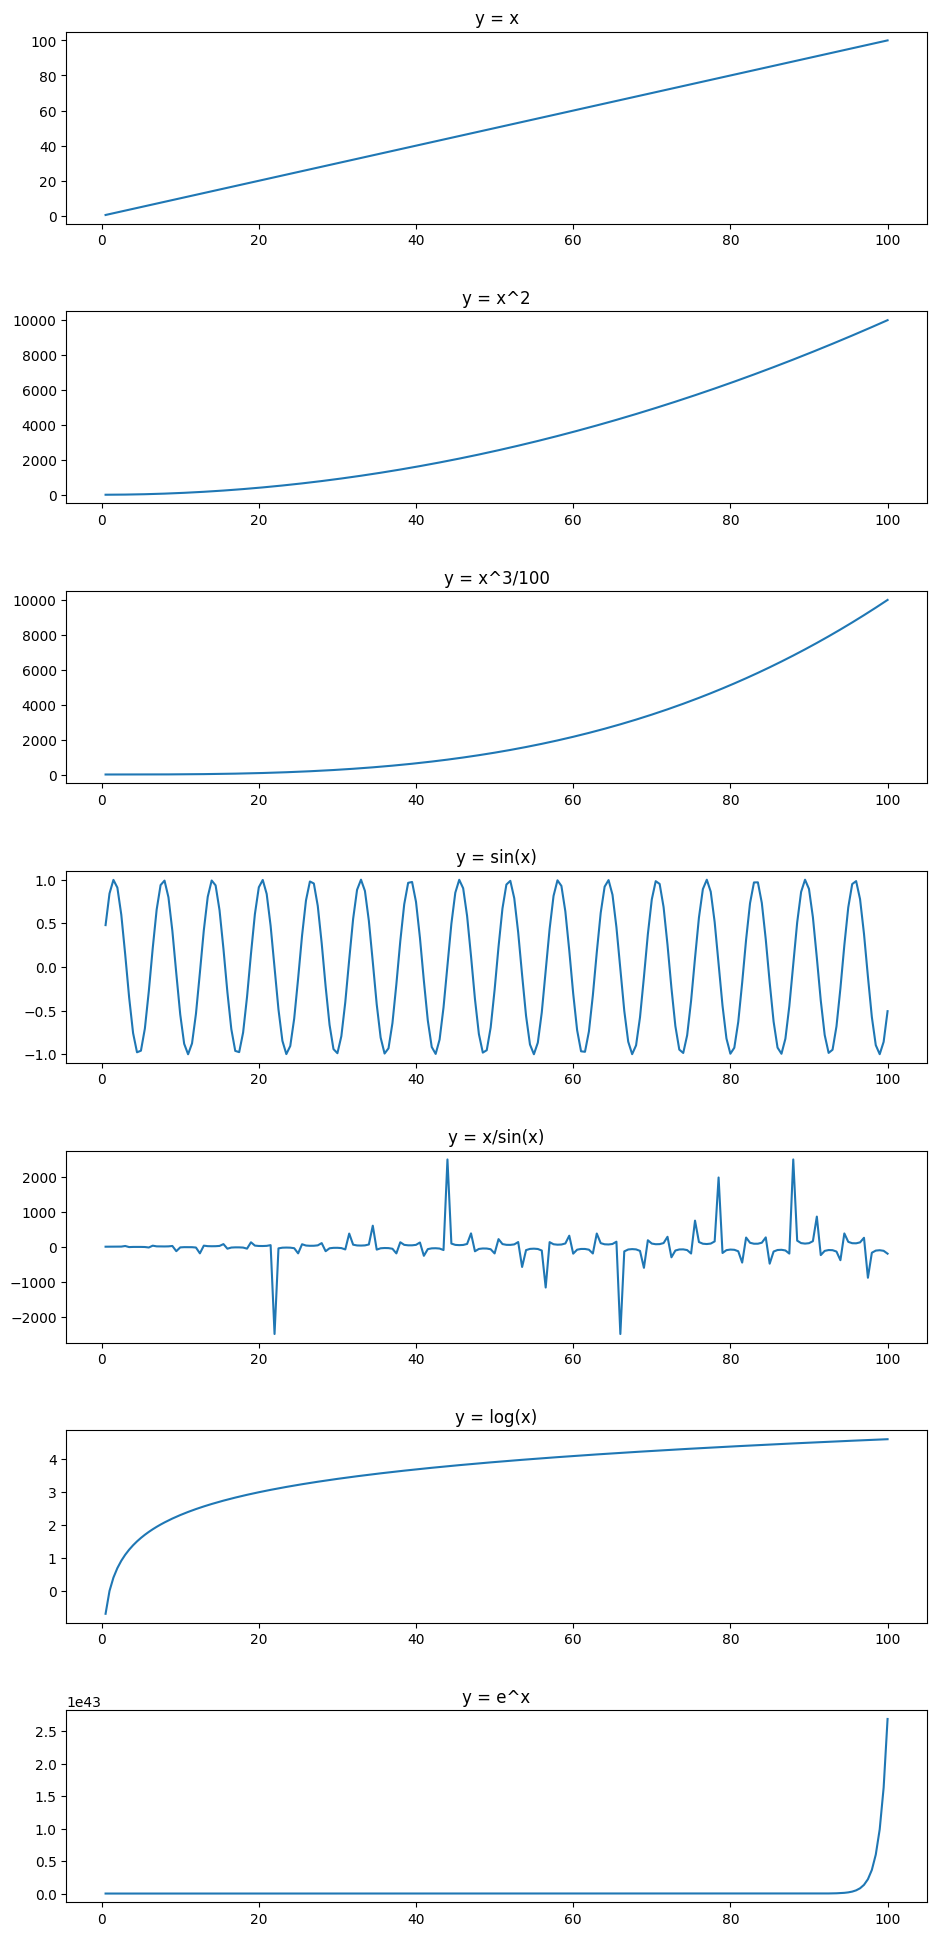

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.5, 100.5, 0.5)

y1 = x
y2 = x**2
y3 = x**3 / 100
y4 = np.sin(x)
y5 = x / np.sin(x)
y6 = np.log(x)
y7 = np.exp(x)

fig, axs = plt.subplots(7, figsize=(10, 20))

axs[0].plot(x, y1)
axs[0].set_title('y = x')

axs[1].plot(x, y2)
axs[1].set_title('y = x^2')

axs[2].plot(x, y3)
axs[2].set_title('y = x^3/100')

axs[3].plot(x, y4)
axs[3].set_title('y = sin(x)')

axs[4].plot(x, y5)
axs[4].set_title('y = x/sin(x)')

axs[5].plot(x, y6)
axs[5].set_title('y = log(x)')

axs[6].plot(x, y7)
axs[6].set_title('y = e^x')

plt.tight_layout(pad=3.0)

plt.show()


# **Q10.** Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [ ]:
import numpy as np
import pandas as pd

matrix_data = np.random.uniform(1, 2, size=(20, 5))

df = pd.DataFrame(matrix_data, columns=["a", "b", "c", "d", "e"])

print("DataFrame:")
print(df)

max_std_col = df.std().idxmax()
print(f"\nColumn with the highest standard deviation: {max_std_col}")

min_mean_row = df.mean(axis=1).idxmin()
print(f"Row with the lowest mean: {min_mean_row}")


DataFrame:
           a         b         c         d         e
0   1.950057  1.500220  1.477197  1.397955  1.759908
1   1.333442  1.856298  1.100842  1.814506  1.271947
2   1.075471  1.989361  1.968833  1.289930  1.245525
3   1.209725  1.646230  1.705061  1.633921  1.204753
4   1.096241  1.416400  1.163101  1.866061  1.107605
5   1.454128  1.605961  1.532085  1.354261  1.468146
6   1.335074  1.985144  1.865851  1.396781  1.186333
7   1.656478  1.673848  1.325585  1.414607  1.625258
8   1.698009  1.951724  1.584039  1.043958  1.392348
9   1.955816  1.640885  1.434635  1.546527  1.821971
10  1.483279  1.482149  1.904462  1.447104  1.577215
11  1.385402  1.373501  1.807018  1.562214  1.573972
12  1.964241  1.763768  1.663755  1.066078  1.540097
13  1.895795  1.500780  1.845854  1.295741  1.513584
14  1.997690  1.276007  1.851882  1.979897  1.852570
15  1.687801  1.555126  1.612061  1.420365  1.016509
16  1.517988  1.716988  1.713034  1.383879  1.465204
17  1.477657  1.262558  1.305430  1

# **Q11.** Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [ ]:
import numpy as np
import pandas as pd

matrix_data = np.random.uniform(1, 2, size=(20, 5))

df = pd.DataFrame(matrix_data, columns=["a", "b", "c", "d", "e"])

df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

print("Modified DataFrame:")
print(df)

lt8_count = df[df['g'] == 'LT8'].shape[0]
print(f"\nNumber of rows where the value in column 'g' is 'LT8': {lt8_count}")

std_lt8 = df[df['g'] == 'LT8']['f'].std()
std_gt8 = df[df['g'] == 'GT8']['f'].std()

print(f"Standard deviation of column 'f' where 'g' is 'LT8': {std_lt8}")
print(f"Standard deviation of column 'f' where 'g' is 'GT8': {std_gt8}")


Modified DataFrame:
           a         b         c         d         e         f    g
0   1.837923  1.426568  1.460870  1.569716  1.805267  8.100344  GT8
1   1.477624  1.393586  1.448031  1.069103  1.403820  6.792164  LT8
2   1.826976  1.883740  1.132201  1.470377  1.196313  7.509606  LT8
3   1.552832  1.658440  1.320490  1.019252  1.190244  6.741258  LT8
4   1.287247  1.637977  1.979469  1.103959  1.560792  7.569445  LT8
5   1.853154  1.903551  1.999756  1.294826  1.982748  9.034036  GT8
6   1.050169  1.159027  1.951650  1.594047  1.673972  7.428864  LT8
7   1.985832  1.280252  1.921737  1.310365  1.354716  7.852902  LT8
8   1.026333  1.762374  1.998419  1.999786  1.675268  8.462181  GT8
9   1.693481  1.869477  1.886909  1.614482  1.292192  8.356541  GT8
10  1.811924  1.899745  1.482462  1.803367  1.898933  8.896432  GT8
11  1.917892  1.055664  1.712659  1.553571  1.406929  7.646715  LT8
12  1.789967  1.848613  1.015536  1.902192  1.582507  8.138816  GT8
13  1.007096  1.635488  1.18

# **Q12.** Write a small piece of code to explain broadcasting in numpy.

In [ ]:
import numpy as np

matrix = np.array([[1, 2, 3],
                   [4, 5, 6]])

scalar_addition_result = matrix + 10
scalar_multiplication_result = matrix * 2

print("Original Matrix:")
print(matrix)

print("\nMatrix after Scalar Addition:")
print(scalar_addition_result)

print("\nMatrix after Scalar Multiplication:")
print(scalar_multiplication_result)


Original Matrix:
[[1 2 3]
 [4 5 6]]

Matrix after Scalar Addition:
[[11 12 13]
 [14 15 16]]

Matrix after Scalar Multiplication:
[[ 2  4  6]
 [ 8 10 12]]


# **Q13.** Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [ ]:
import numpy as np

def custom_argmin(arr):
    min_index = 0
    min_value = arr[0]

    for i in range(1, len(arr)):
        if arr[i] < min_value:
            min_value = arr[i]
            min_index = i

    return min_index

array_example = np.array([4, 2, 7, 1, 9, 5])

result_custom = custom_argmin(array_example)
print(f"Custom argmin result: {result_custom}")

result_np = np.argmin(array_example)
print(f"NumPy argmin result: {result_np}")


Custom argmin result: 3
NumPy argmin result: 3
